# Welcome, You can use this model for any of your dataset

## Features of this model

   * This model Cleans the dataset Automatically 
   * This model is useful for Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = sns.load_dataset(input("Enter the name of the Seaborn DataSet : "))

Enter the name of the Seaborn DataSet : titanic


In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


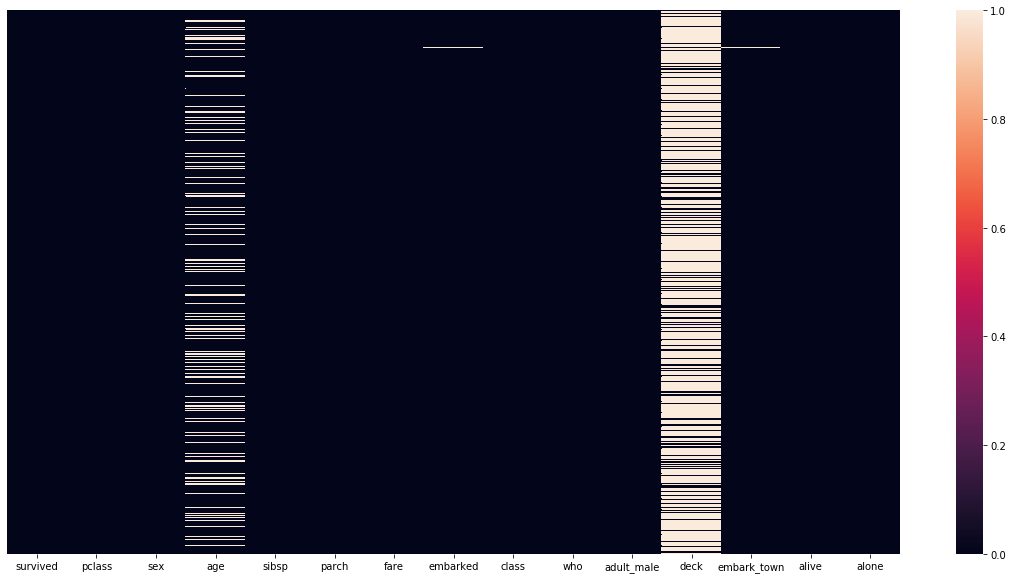

In [4]:
plt.figure(figsize = [20,10])
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

In [5]:
Numeric_columns = []
Dropped_columns = []
columns = []
def encoding(data) :
       # print("Dropped columns are : ")
        for i in data.columns:
            if(data[i].dtype == np.int32 or data[i].dtype == np.int64 or data[i].dtype== np.float32 or data[i].dtype== np.float64 ):
                pass
            else:
                data[i] = data[i].astype("category").cat.codes

def cleaning1(data):
        
        for i in data.columns:
            if((((data[i].isnull().sum())/len(data[i]))*100) > 50):
                data.drop(i,axis = 1,inplace = True)
                Dropped_columns.append(i)
                #print(i)
        
            else:
                if data[i].dtype == np.int32 or data[i].dtype == np.int64 or data[i].dtype == np.float32 or data[i].dtype == np.float64:
                    Numeric_columns.append(i)
                    data[i] = data[i].fillna(data[i].mean())
                else:
                    mode = data[i].mode()
                    data[i] = data[i].fillna(mode.loc[0])
                    
def dealing_with_inconsistentdata(data):
    for i in Numeric_columns:
            Q1 =data[i].quantile(0.25)
            Q3 =data[i].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - (IQR*1.5)
            Upper = Q3 + (IQR*1.5)
            data[i] = data[i].apply(lambda x : x if(x > lower and x < Upper) else None)
    cleaning1(data)
            
 

In [6]:
def cleaning(data):
    cleaning1(data)
    encoding(data)
    dealing_with_inconsistentdata(data)
cleaning(data)

In [7]:
data.head()

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1.0,7.250000,2,2,1,1,2,0,0
1,1,1,0,38.0,1.0,17.822091,0,0,2,0,0,1,0
2,1,3,0,26.0,0.0,7.925000,2,2,2,0,2,1,1
3,1,1,0,35.0,1.0,53.100000,2,0,2,0,2,1,0
4,0,3,1,35.0,0.0,8.050000,2,2,1,1,2,0,1


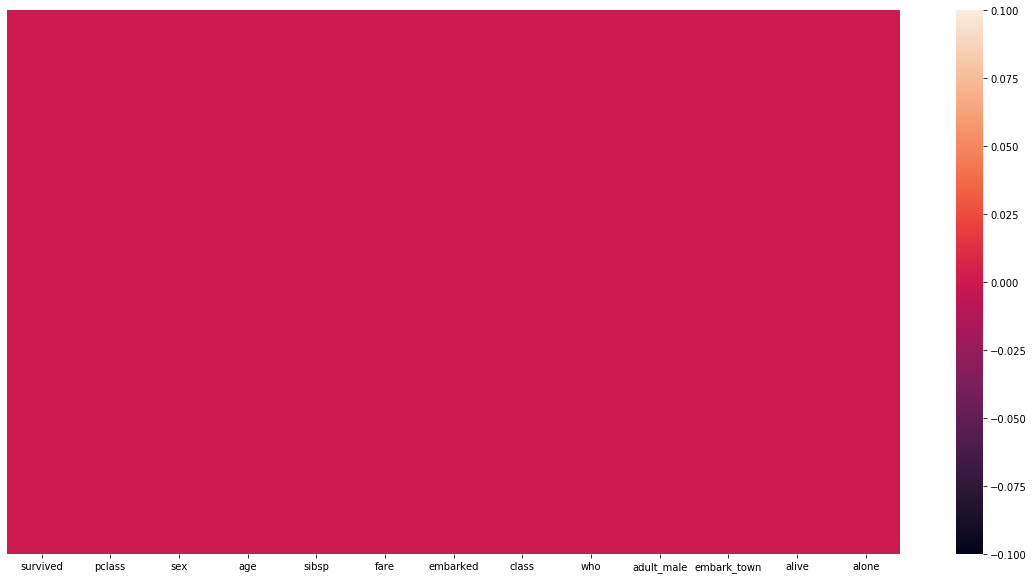

In [8]:
plt.figure(figsize = [20,10])
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

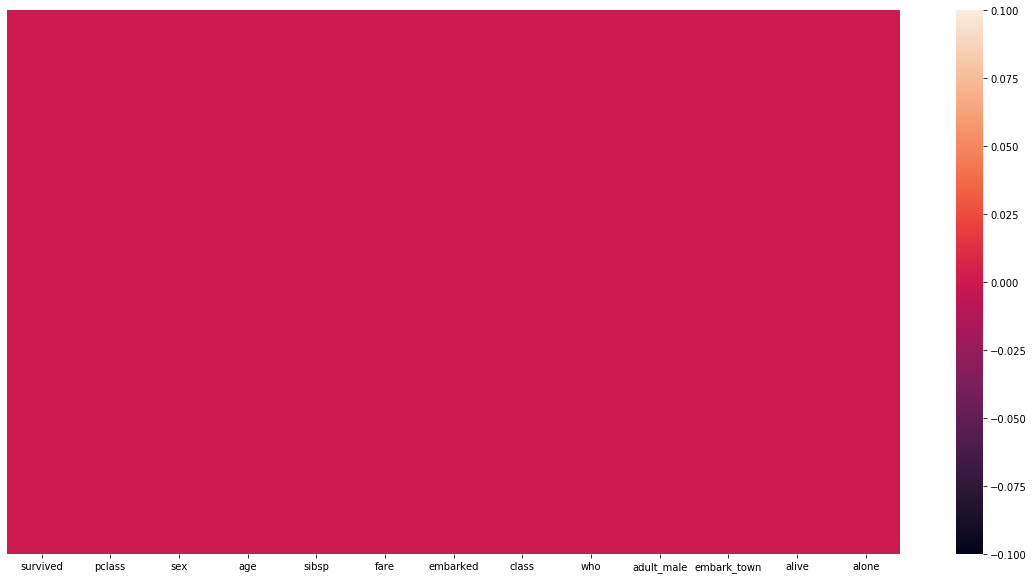

In [9]:
plt.figure(figsize = [20,10])
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

In [10]:
class train_test_split1:
    
    
    def __init__ (self,data):
        self.data = data
        
        #self.train_size = 0.8
      
    def train_test_split(self):
        
            y = input("Enter dependent columns name : ")
            print()
            train_size = float(input("Enter train size value for spliting the dataset with in the range of (0-1) : "))
            if(train_size > 0 and train_size < 1):
                pass
            else:
                print()
                print("Size Must Lies between 0 - 1 ")
               
            
            data_len = len(self.data[y])
            Training= random.sample(range(0,data_len),int(((train_size)*data_len)))
            Testing = []
            for i in range(0,data_len):
                if i in Training:
                    pass
                else:
                    Testing.append(i)

    #print(len(Testing))
    #print(len(Training))
            Training_data = data.loc[Training,:]

            Testing_data = data.loc[Testing,:]
    #print(Training_data.shape)
    #print(Testing_data.shape)
            X_train = Training_data.drop(y,axis = 1)
            X_test = Testing_data.drop(y, axis = 1)
            y_train = Training_data[y]
            y_test = Testing_data[y]
            return X_train,X_test, y_train,y_test
        

In [11]:
tts = train_test_split1(data)
X_train, X_test, y_train,y_test = tts.train_test_split()

Enter dependent columns name : survived

Enter train size value for spliting the dataset with in the range of (0-1) : 0.8


In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
lr_list = [0.001,0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
acc = []

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=10, learning_rate=learning_rate, max_features=2, max_depth = 3, random_state=0)
    gb_clf.fit(X_train, y_train)
    acc.append((gb_clf.score(X_test, y_test)))
    

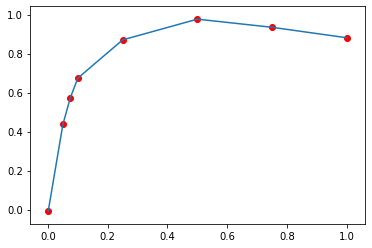

In [14]:
plt.plot( lr_list , acc )
plt.scatter( lr_list , acc , color = "r" )
plt.show()

In [15]:
model = GradientBoostingRegressor(n_estimators=20, learning_rate=max(acc), max_features=2, max_depth=2, random_state=0)
model.fit(X_train, y_train)
print("Accuracy score : {0:.3f}".format(gb_clf.score(X_train, y_train)))


Accuracy score : 0.964
